<a href="https://colab.research.google.com/github/lapatradaa/MCTS/blob/main/UM_Game_Playing_Strength_of_MCTS_Variants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/MCTS/train.csv')
test = pd.read_csv('/content/drive/MyDrive/MCTS/test.csv')
concepts = pd.read_csv('/content/drive/MyDrive/MCTS/concepts.csv')

In [4]:
train.head(5)

,Id,GameRulesetName,agent1,agent2,Properties,Format,Time,Discrete,Realtime,Turns,...,DoLudeme,Trigger,PlayoutsPerSecond,MovesPerSecond,EnglishRules,LudRules,num_wins_agent1,num_draws_agent1,num_losses_agent1,utility_agent1
0,0,00Y,MCTS-ProgressiveHistory-0.1-MAST-false,MCTS-ProgressiveHistory-0.6-Random200-false,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",4,0,11,-0.466667
1,1,00Y,MCTS-ProgressiveHistory-0.1-MAST-false,MCTS-UCB1GRAVE-0.6-NST-true,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",5,0,10,-0.333333
2,2,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1-0.1-NST-false,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",7,0,8,-0.066667
3,3,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1-0.6-NST-false,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",5,0,10,-0.333333
4,4,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1GRAVE-1.41421356237-NST-false,1,1,1,1,0,1,...,0,1,298.07,18877.17,Goal: Connect all three edge colors with a sin...,"(game ""00'Y'"" (players 2) (equipment { (board ...",5,0,10,-0.333333


In [5]:
# prompt: drop all columns with no unique values

for column in train.columns:
  if train[column].nunique() == 1:
    train = train.drop(column, axis=1)


In [6]:
# prompt: drop all columns where nunique = 0

for column in train.columns:
  if train[column].nunique() == 0:
    train = train.drop(column, axis=1)

print(f"Number of columns: {len(train.columns)}")
for column in train.columns:
  print(f"{column}: {train[column].nunique()}")


Number of columns: 598
Id: 233234
GameRulesetName: 1377
agent1: 72
agent2: 72
Stochastic: 2
Asymmetric: 2
AsymmetricForces: 2
AsymmetricPiecesType: 2
PlayersWithDirections: 2
Cooperation: 2
Team: 2
Shape: 2
SquareShape: 2
HexShape: 2
TriangleShape: 2
DiamondShape: 2
RectangleShape: 2
SpiralShape: 2
CircleShape: 2
StarShape: 2
SquarePyramidalShape: 2
RegularShape: 2
PolygonShape: 2
Tiling: 2
SquareTiling: 2
HexTiling: 2
TriangleTiling: 2
SemiRegularTiling: 2
MorrisTiling: 2
CircleTiling: 2
ConcentricTiling: 2
SpiralTiling: 2
AlquerqueTiling: 2
MancalaBoard: 2
MancalaStores: 2
MancalaTwoRows: 2
MancalaThreeRows: 2
MancalaFourRows: 2
MancalaSixRows: 2
MancalaCircular: 2
AlquerqueBoard: 2
AlquerqueBoardWithOneTriangle: 2
AlquerqueBoardWithTwoTriangles: 2
AlquerqueBoardWithFourTriangles: 2
AlquerqueBoardWithEightTriangles: 2
ThreeMensMorrisBoard: 2
ThreeMensMorrisBoardWithTwoTriangles: 2
NineMensMorrisBoard: 2
StarBoard: 2
CrossBoard: 2
KintsBoard: 2
PachisiBoard: 2
FortyStonesWithFourGapsB

In [7]:
# prompt: drop Id column

train = train.drop('Id', axis=1)


In [8]:
# prompt: print the number of columns and the number of unqiue values of each column

print(f"Number of columns: {len(train.columns)}")
for column in train.columns:
  print(f"{column}: {train[column].nunique()}")


Number of columns: 597
GameRulesetName: 1377
agent1: 72
agent2: 72
Stochastic: 2
Asymmetric: 2
AsymmetricForces: 2
AsymmetricPiecesType: 2
PlayersWithDirections: 2
Cooperation: 2
Team: 2
Shape: 2
SquareShape: 2
HexShape: 2
TriangleShape: 2
DiamondShape: 2
RectangleShape: 2
SpiralShape: 2
CircleShape: 2
StarShape: 2
SquarePyramidalShape: 2
RegularShape: 2
PolygonShape: 2
Tiling: 2
SquareTiling: 2
HexTiling: 2
TriangleTiling: 2
SemiRegularTiling: 2
MorrisTiling: 2
CircleTiling: 2
ConcentricTiling: 2
SpiralTiling: 2
AlquerqueTiling: 2
MancalaBoard: 2
MancalaStores: 2
MancalaTwoRows: 2
MancalaThreeRows: 2
MancalaFourRows: 2
MancalaSixRows: 2
MancalaCircular: 2
AlquerqueBoard: 2
AlquerqueBoardWithOneTriangle: 2
AlquerqueBoardWithTwoTriangles: 2
AlquerqueBoardWithFourTriangles: 2
AlquerqueBoardWithEightTriangles: 2
ThreeMensMorrisBoard: 2
ThreeMensMorrisBoardWithTwoTriangles: 2
NineMensMorrisBoard: 2
StarBoard: 2
CrossBoard: 2
KintsBoard: 2
PachisiBoard: 2
FortyStonesWithFourGapsBoard: 2
Tra

In [8]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer

# Modeling
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_squared_error

# Saving the model
import joblib

# For handling warnings
import warnings
warnings.filterwarnings('ignore')


In [16]:
# Check for missing values in the training data
print("Missing Values in Training Data:")
print(train.isnull().sum().sort_values(ascending=False))


Missing Values in Training Data:
utility_agent1       0
GameRulesetName      0
agent1               0
agent2               0
Stochastic           0
                    ..
HexTiling            0
TriangleTiling       0
SemiRegularTiling    0
MorrisTiling         0
CircleTiling         0
Length: 597, dtype: int64


In [17]:
from sklearn.impute import SimpleImputer

# Identify numerical and categorical features
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('utility_agent1')  # Exclude target variable

categorical_features = train.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumber of numerical features: {len(numeric_features)}")
print(f"Number of categorical features: {len(categorical_features)}")

# Initialize imputers
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Impute numerical features
train[numeric_features] = imputer_num.fit_transform(train[numeric_features])

# Impute categorical features
train[categorical_features] = imputer_cat.fit_transform(train[categorical_features])



Number of numerical features: 591
Number of categorical features: 5


In [18]:
# Function to parse agent strings
def parse_agent(agent_str):
    try:
        parts = agent_str.split('-')
        return pd.Series({
            'SELECTION': parts[1],
            'EXPLORATION_CONST': float(parts[2]),
            'PLAYOUT': parts[3],
            'SCORE_BOUNDS': 1 if parts[4].lower() == 'true' else 0
        })
    except:
        # Handle unexpected formats by assigning default or unknown values
        return pd.Series({
            'SELECTION': 'Unknown',
            'EXPLORATION_CONST': np.nan,
            'PLAYOUT': 'Unknown',
            'SCORE_BOUNDS': 0
        })

# Parse 'agent1'
agent1_parsed = train['agent1'].apply(parse_agent)
agent1_parsed = agent1_parsed.rename(columns=lambda x: f'agent1_{x}')
train = pd.concat([train, agent1_parsed], axis=1)

# Parse 'agent2'
agent2_parsed = train['agent2'].apply(parse_agent)
agent2_parsed = agent2_parsed.rename(columns=lambda x: f'agent2_{x}')
train = pd.concat([train, agent2_parsed], axis=1)

# Drop the original 'agent1' and 'agent2' columns
train.drop(['agent1', 'agent2'], axis=1, inplace=True)

# Check for any missing values introduced by parsing
print("\nMissing Values in Parsed Agent Features:")
print(train[['agent1_EXPLORATION_CONST', 'agent2_EXPLORATION_CONST']].isnull().sum())

# Impute any missing 'EXPLORATION_CONST' with median
train[['agent1_EXPLORATION_CONST', 'agent2_EXPLORATION_CONST']] = imputer_num.fit_transform(
    train[['agent1_EXPLORATION_CONST', 'agent2_EXPLORATION_CONST']]
)



Missing Values in Parsed Agent Features:
agent1_EXPLORATION_CONST    0
agent2_EXPLORATION_CONST    0
dtype: int64


In [19]:
# Identify remaining categorical features after parsing agents
categorical_features = train.select_dtypes(include=['object']).columns.tolist()

print(f"\nCategorical Features to Encode: {categorical_features}")

# Apply One-Hot Encoding
train = pd.get_dummies(train, columns=categorical_features, drop_first=True)

print(f"\nTraining Data Shape after One-Hot Encoding: {train.shape}")



Categorical Features to Encode: ['GameRulesetName', 'EnglishRules', 'LudRules', 'agent1_SELECTION', 'agent1_PLAYOUT', 'agent2_SELECTION', 'agent2_PLAYOUT']

Training Data Shape after One-Hot Encoding: (233234, 4681)


In [20]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features (excluding the target)
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('utility_agent1')

print(f"\nNumerical Features to Scale: {numerical_features}")

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on training data
train[numerical_features] = scaler.fit_transform(train[numerical_features])

print("\nNumerical Features have been scaled.")



Numerical Features to Scale: ['Stochastic', 'Asymmetric', 'AsymmetricForces', 'AsymmetricPiecesType', 'PlayersWithDirections', 'Cooperation', 'Team', 'Shape', 'SquareShape', 'HexShape', 'TriangleShape', 'DiamondShape', 'RectangleShape', 'SpiralShape', 'CircleShape', 'StarShape', 'SquarePyramidalShape', 'RegularShape', 'PolygonShape', 'Tiling', 'SquareTiling', 'HexTiling', 'TriangleTiling', 'SemiRegularTiling', 'MorrisTiling', 'CircleTiling', 'ConcentricTiling', 'SpiralTiling', 'AlquerqueTiling', 'MancalaBoard', 'MancalaStores', 'MancalaTwoRows', 'MancalaThreeRows', 'MancalaFourRows', 'MancalaSixRows', 'MancalaCircular', 'AlquerqueBoard', 'AlquerqueBoardWithOneTriangle', 'AlquerqueBoardWithTwoTriangles', 'AlquerqueBoardWithFourTriangles', 'AlquerqueBoardWithEightTriangles', 'ThreeMensMorrisBoard', 'ThreeMensMorrisBoardWithTwoTriangles', 'NineMensMorrisBoard', 'StarBoard', 'CrossBoard', 'KintsBoard', 'PachisiBoard', 'FortyStonesWithFourGapsBoard', 'Track', 'TrackLoop', 'TrackOwned', 'Re

In [21]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold with a threshold (e.g., 0.01)
selector = VarianceThreshold(threshold=0.01)

# Fit the selector on the training data (excluding target)
selector.fit(train.drop(['utility_agent1'], axis=1))

# Get the list of features to keep
features_to_keep = train.drop(['utility_agent1'], axis=1).columns[selector.get_support()]

print(f"\nNumber of features before Variance Threshold: {train.shape[1]-1}")
print(f"Number of features after Variance Threshold: {len(features_to_keep)}")

# Reduce the dataset to only keep these features
train = train[features_to_keep.tolist() + ['utility_agent1']]



Number of features before Variance Threshold: 4680
Number of features after Variance Threshold: 606


In [22]:
# Compute the correlation matrix
corr_matrix = train.drop(['utility_agent1'], axis=1).corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"\nNumber of features to drop due to high correlation: {len(to_drop)}")

# Drop these highly correlated features
train.drop(to_drop, axis=1, inplace=True)



Number of features to drop due to high correlation: 120


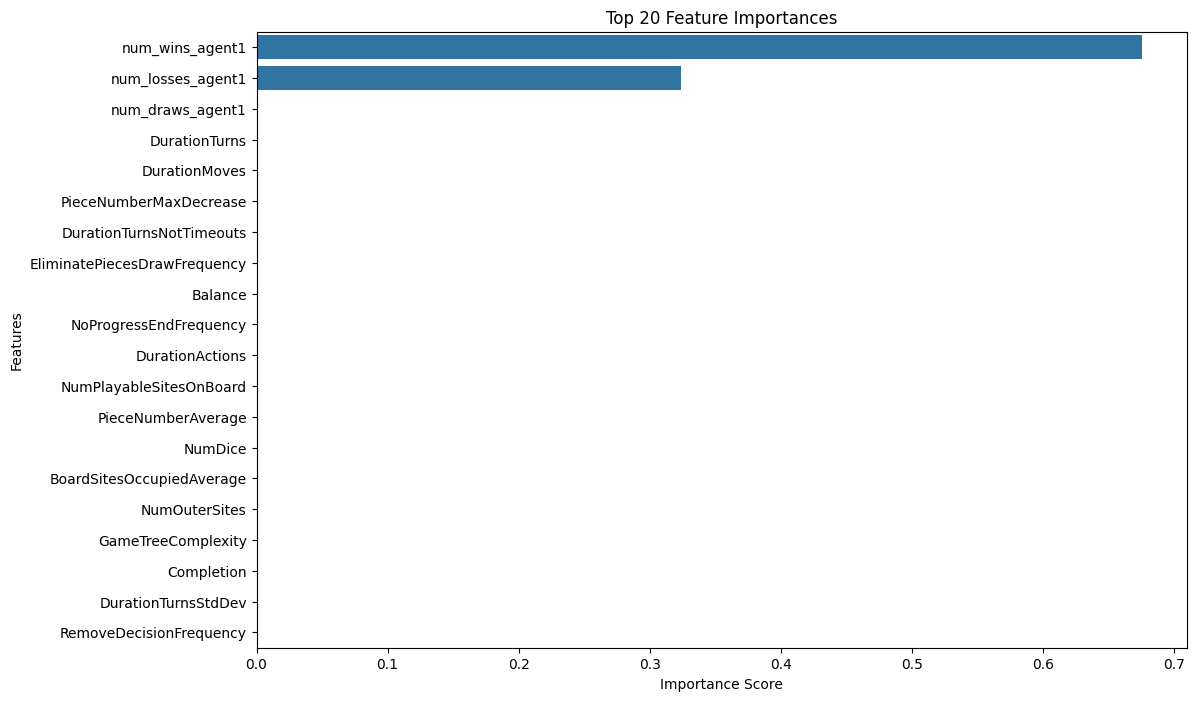


Selecting Top 100 Features based on Importance.


In [23]:
# Separate features and target
X = train.drop(['utility_agent1'], axis=1)
y = train['utility_agent1']

# Initialize Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot the top 20 feature importances
plt.figure(figsize=(12,8))
sns.barplot(x=importances[:20], y=importances.index[:20])
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Select top N features (e.g., top 100)
top_n = 100
top_features = importances[:top_n].index.tolist()

print(f"\nSelecting Top {top_n} Features based on Importance.")

# Reduce the dataset to only keep top features
train = train[top_features + ['utility_agent1']]


In [24]:
from sklearn.model_selection import train_test_split

# Define features and target
X = train.drop(['utility_agent1'], axis=1)
y = train['utility_agent1']

# Split the data (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining Set Size: {X_train.shape}")
print(f"Validation Set Size: {X_val.shape}")



Training Set Size: (186587, 100)
Validation Set Size: (46647, 100)


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf.fit(X_train, y_train)

print("\nRandom Forest model has been trained.")


Random Forest model has been trained.


In [27]:
from sklearn.metrics import mean_squared_error

# Make predictions on the validation set
y_pred = rf.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"\nRandom Forest RMSE on Validation Set: {rmse:.4f}")



Random Forest RMSE on Validation Set: 0.0031


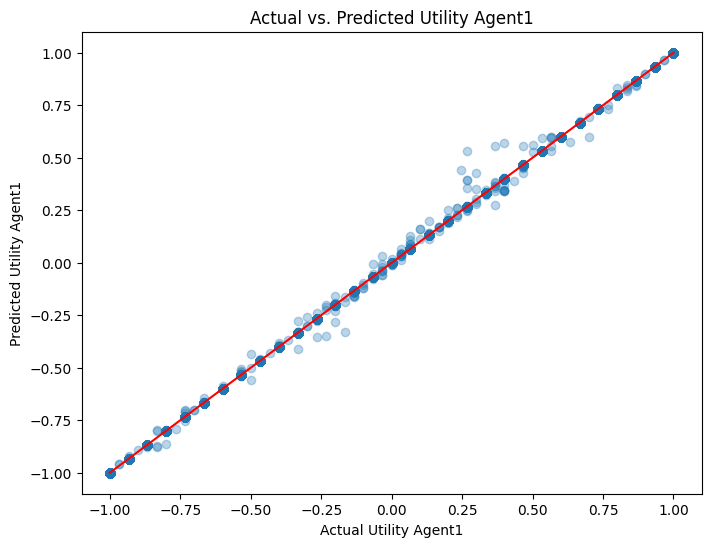

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.xlabel('Actual Utility Agent1')
plt.ylabel('Predicted Utility Agent1')
plt.title('Actual vs. Predicted Utility Agent1')
plt.plot([-1,1], [-1,1], color='red')  # Diagonal line for reference
plt.show()


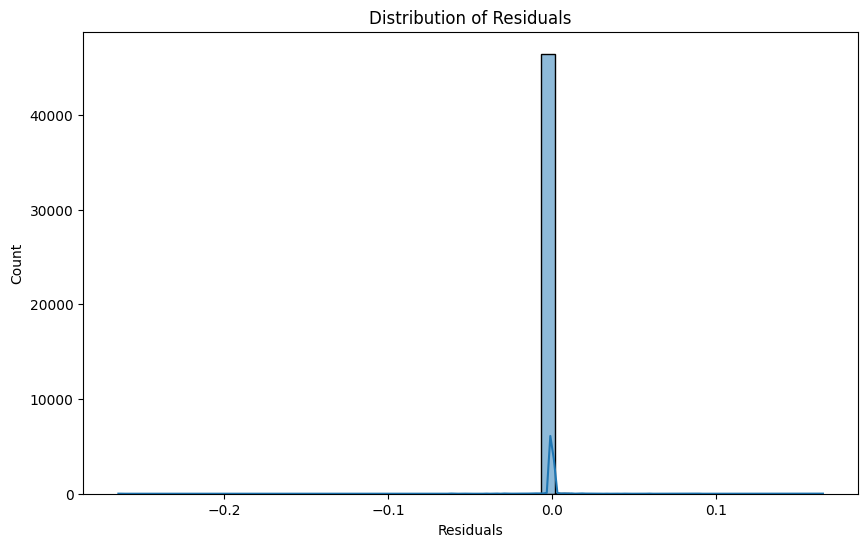

In [29]:
residuals = y_val - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


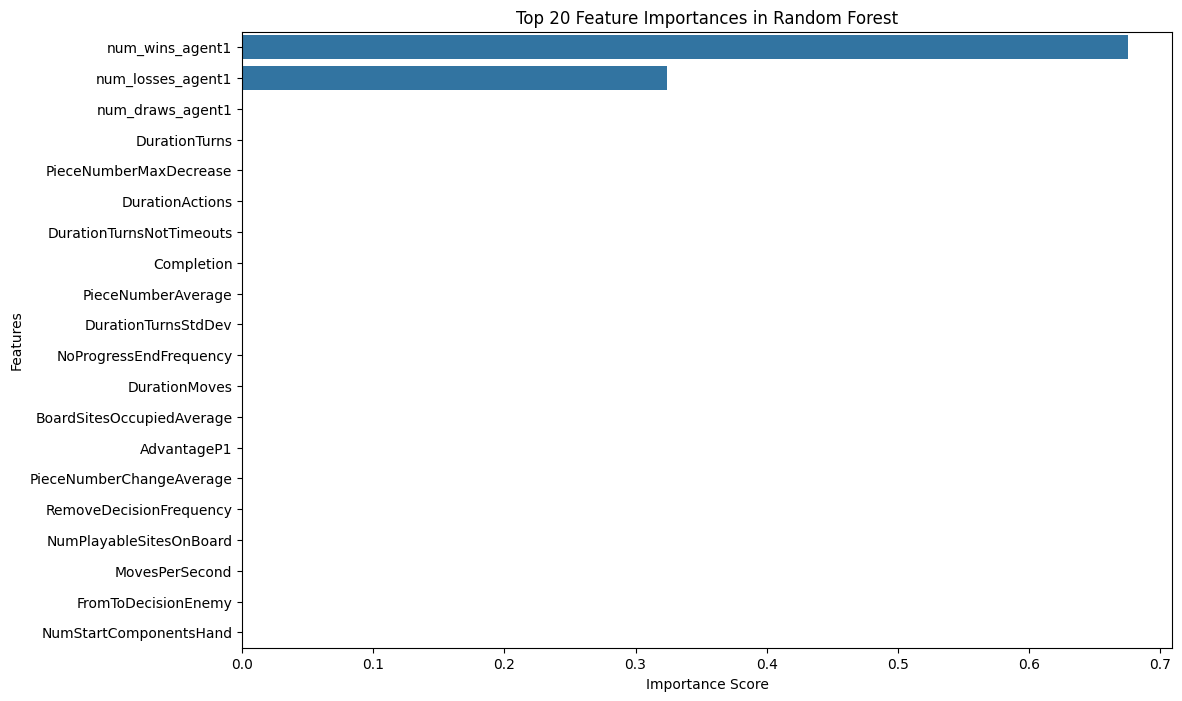

In [30]:
# Get feature importances from the trained model
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the top 20 important features
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances[:20], y=feature_importances.index[:20])
plt.title('Top 20 Feature Importances in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

# Fit GridSearchCV on the training data
print("\nStarting Grid Search...")
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"\nBest Parameters from Grid Search: {best_params}")

# Best score (negative MSE)
best_score = grid_search.best_score_
best_rmse = np.sqrt(-best_score)
print(f"Best CV RMSE from Grid Search: {best_rmse:.4f}")



Starting Grid Search...
Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

# Fit RandomizedSearchCV on the training data
print("\nStarting Randomized Search...")
random_search.fit(X_train, y_train)

# Best parameters
best_params_random = random_search.best_params_
print(f"\nBest Parameters from Randomized Search: {best_params_random}")

# Best score (negative MSE)
best_score_random = random_search.best_score_
best_rmse_random = np.sqrt(-best_score_random)
print(f"Best CV RMSE from Randomized Search: {best_rmse_random:.4f}")


In [ ]:
# Initialize the final Random Forest Regressor with best hyperparameters
final_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42,
    n_jobs=-1
)

# Train the final model on the entire dataset
final_rf.fit(X, y)

print("\nFinal Random Forest model has been trained on the entire dataset.")


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(
    final_rf, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Calculate RMSE for each fold
cv_rmse = np.sqrt(-cv_scores)
print(f"\nCross-Validation RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")


In [ ]:
# Get feature importances from the final model
feature_importances_final = pd.Series(final_rf.feature_importances_, index=X.columns)
feature_importances_final = feature_importances_final.sort_values(ascending=False)

# Plot the top 20 feature importances
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances_final[:20], y=feature_importances_final.index[:20])
plt.title('Top 20 Feature Importances in Final Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()